C:\Users\willi\AppData\Local\Temp\ipykernel_77932\482069000.py:21: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  oxide_entries = mpr.summary.search(chemsys=f"{metal}-O")


Retrieving SummaryDoc documents:   0%|          | 0/124 [00:00<?, ?it/s]

C:\Users\willi\AppData\Local\Temp\ipykernel_77932\482069000.py:29: DeprecationWarning: Accessing summary data through MPRester.summary is deprecated. Please use MPRester.materials.summary instead.
  nitride_entries = mpr.summary.search(chemsys=f"{metal}-N")


Retrieving SummaryDoc documents:   0%|          | 0/16 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/31 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/19 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/15 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/16 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/33 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/24 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/43 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/28 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/47 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/90 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/103 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/28 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/3 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/23 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/7 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/114 [00:00<?, ?it/s]

Retrieving SummaryDoc documents:   0%|          | 0/4 [00:00<?, ?it/s]

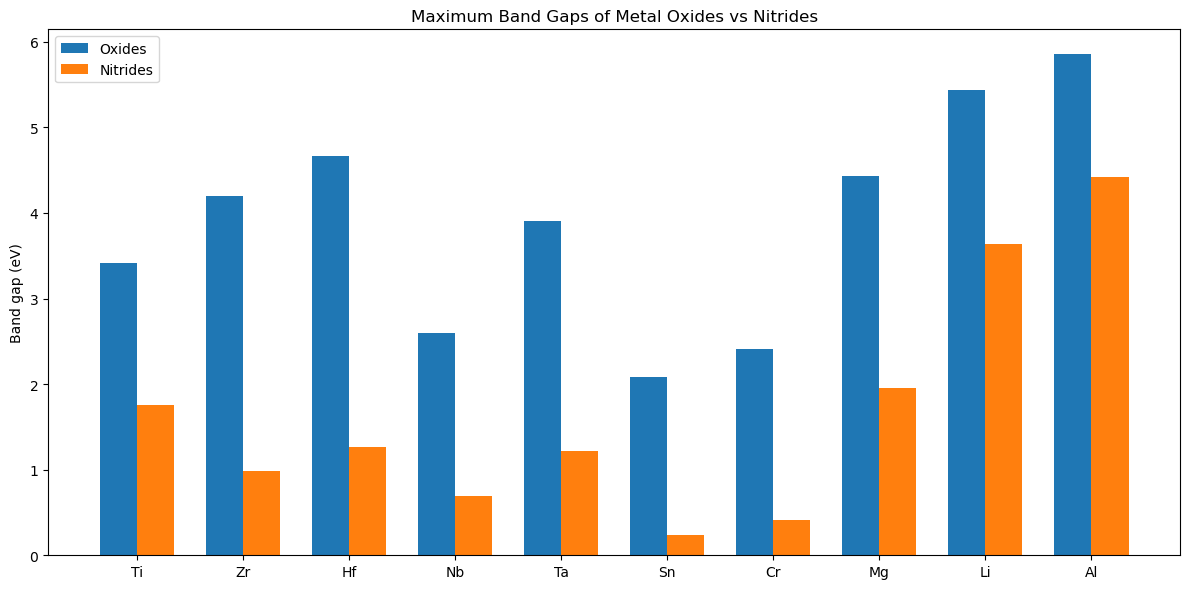

In [10]:
# oxide_vs_nitride_bandgap.py

import matplotlib.pyplot as plt
from pymatgen.ext.matproj import MPRester
import numpy as np

# Insert your Materials Project API key here
API_KEY = "YourApiKey"

# Metals of interest
metals = ["Ti", "Zr", "Hf", "Nb", "Ta", "Sn", "Cr", "Mg", "Li", "Al"]

# Initialize MPRester
with MPRester(API_KEY) as mpr:
    oxide_bandgaps = []
    nitride_bandgaps = []
    elements = []

    for metal in metals:
        # Query all oxides of metal
        oxide_entries = mpr.summary.search(chemsys=f"{metal}-O")
        oxide_bandgap = None
        if oxide_entries:
            bandgaps = [entry.band_gap for entry in oxide_entries if entry.band_gap is not None]
            if bandgaps:
                oxide_bandgap = max(bandgaps)

        # Query all nitrides of metal
        nitride_entries = mpr.summary.search(chemsys=f"{metal}-N")
        nitride_bandgap = None
        if nitride_entries:
            bandgaps = [entry.band_gap for entry in nitride_entries if entry.band_gap is not None]
            if bandgaps:
                nitride_bandgap = max(bandgaps)

        # Store only if we got at least one result
        if oxide_bandgap is not None or nitride_bandgap is not None:
            elements.append(metal)
            oxide_bandgaps.append(oxide_bandgap)
            nitride_bandgaps.append(nitride_bandgap)

# Plotting
import numpy as np

x = np.arange(len(elements))  # label locations
width = 0.35  # bar width

fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(x - width/2, oxide_bandgaps, width, label='Oxides')
rects2 = ax.bar(x + width/2, nitride_bandgaps, width, label='Nitrides')

# Labels
ax.set_ylabel('Band gap (eV)')
ax.set_title('Maximum Band Gaps of Metal Oxides vs Nitrides')
ax.set_xticks(x)
ax.set_xticklabels(elements)
ax.legend()

plt.tight_layout()
plt.show()